# COMP4318 & 5318 - Machine Learning and Data Mining: Assignment 1

Due: Sunday Week 7 - Sep 15th, 2024 11:59PM

# 1. Summary

In this assignment, you are tasked with the challenge of developing machine learning (ML) classifiers capable of categorizing grayscale images into predefined classes. Your task involves employing various classification algorithms to identify which is most effective and efficient in processing image data. Additionally, you are required to document your methodologies and findings in a detailed report. The total score for this assignment is allocated as follows:

1. Code: max 65 points
2. Report: max 35 points

Detailed about assignment specifcations and scoring criteria can be found in the assignment page on Canvas (Assignments $\rightarrow$ Assignment 1 - Specification). The sections below provide comprehensive information on the assignment tasks and guidelines for submission.

# 2. Dataset description


The dataset for this assignment is derived from the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a collection of fashion articles represented as grayscale images. This dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. Your prediction over the test set must be submitted to Kaggle to receive the public accuracy over first 2,000 examples, you will use this accuracy to analyse the performance of your proposed method. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose.

Data samples are categorized into the following ten classes:

- 0: T-shirt/Top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


Below are visual examples of the dataset, showcasing samples from each category:

<img src="https://www.researchgate.net/publication/346405197/figure/fig3/AS:962581560848384@1606508736352/Examples-of-Fashion-MNIST-dataset.ppm" alt="DataSet" title="DataSet" width=500/>

The dataset can be downloaded from the Assignment 1 page on Canvas. Note that only a subset of the original Fashion-MNIST dataset is provided for this assignment. You must use the specific files supplied in the assignment materials for training and testing.

# 3. Data Preparation

The required `data` files are in the data folder, downloadable as a zip from the Assignment 1 - Specification page on Canvas. Extract the files into your working directory. The folder includes:

- `train.csv`: 30,000 labeled samples for training, evaluation, and model selection.
- `test1.csv`: 2,000 labeled samples for model efficiency testing (Canvas submission).
- `test2.csv`: 5,000 unlabeled samples for Kaggle evaluation.
- `sample.csv`: A sample prediction file format for Kaggle submission (`test_output.csv`).

Use Python's pandas library to load these CSV files into DataFrames, ensuring they are under the `./data/` directory.

## 3.1 Loading data

Use the following Python code to load the training data:  

In [2]:
import pandas as pd
import os
print(os.listdir("./data"))
pd.set_option('display.max_columns', 10)

['sample.csv', 'test1.csv', 'test2.csv', 'train.csv']


In [3]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./data/train.csv') 

In [4]:
# print out the first 5 rows of the training dataframe
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,1,0,0,0,0,...,0,0,0,0,6
1,2,0,0,0,0,...,0,0,0,0,7
2,3,0,0,0,0,...,0,0,0,0,4
3,4,0,0,0,0,...,0,0,0,0,7
4,5,0,0,0,0,...,0,0,0,0,3


Then data would be a dataframe with 30,000 samples including 784 features (from v1 to v784) and its label.

In [5]:
# Selecting input feature
# Here, data_train_feature is not a datafram, it is an numpy array
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()
data_train_label= data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

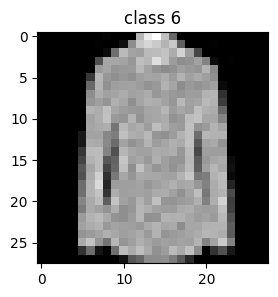

In [6]:
import matplotlib.pyplot as plt

data_train_feature_3D = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.figure(figsize=(3,3))
plt.imshow(data_train_feature_3D[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]))
plt.show()

# 4. Task Description

## 4.1 Code

You will now explore and build diffferent ML models for the given dataset. You are required to implement at least **FOUR** models, which should include THREE from the following methods:

1. Nearest Neighbor
2. Logistic Regression
3. Naïve Bayes 
4. Decision Tree
5. SVM

and ONE of these ensemble methods:
    
 1. Bagging
 2. Boosting
 3. Random forest
    

For these implementations, you may use established packages and libraries that have been introduced in the tutorials such as sklearn or create your own custom solutions from scratch.

Your code must be easily readable and well commented. The following are expected to be satisfied:

- **Readability & Consistency**: Easy to read, and consistent in style
  
- **Coding Descriptions & Comments**: Descriptions and comments clarify meaning where needed
  
- **Robustness**: Handles erroneous or unexpected input 

It should follow the structure below.

### 4.1.1 Environment Setup

Install and import necessary packages and libraries used in your coding environment. It is recommended to specify their versions to ensure reproducibility.

In [7]:
# TODO: Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

def hide_output():
    display(HTML("<style>.output { display: none; }</style>"))
np.random.seed(481)

### 4.1.2 Data Preprocessing

Firstly, I choose to remove NA from the training data set. After doing that, We can see there is no missing value inside "data_train_df". 

In [8]:
# Firstly, let's clean the data, delete missing value, 
print("Before delete missing value:",data_train_df.shape)
data_train_df = data_train_df.dropna()
print(f"After delete missing value:",data_train_df.shape)

Before delete missing value: (30000, 786)
After delete missing value: (30000, 786)


After the clean step, we can now preprocess the data. Here, I first choose to use the Normalization method, for details, please refer to my report. Secondly, I decide to use the PCA method to reduce the number of attributes from 784 to 187.

In [22]:
# scaler = StandardScaler() # standardization
scaler = MinMaxScaler()

pca = PCA(n_components=0.95)  # keep 95%
scaler.fit(data_train_feature)

# apply normalisation to the training set
X_train = scaler.transform(data_train_feature) # firstly normalize data
print("Standaidization feature shape:", X_train.shape)
X_train = pca.fit_transform(X_train) # secondly pca data by using normalized data


print("PCA feature shape:", X_train.shape)

Standaidization feature shape: (30000, 784)
PCA feature shape: (30000, 187)


Before I split the validation set from the training set, we need to observe the distribution of all samples' labels. And I found every class is equally distributed which implies that I need not solve the skew problems. 

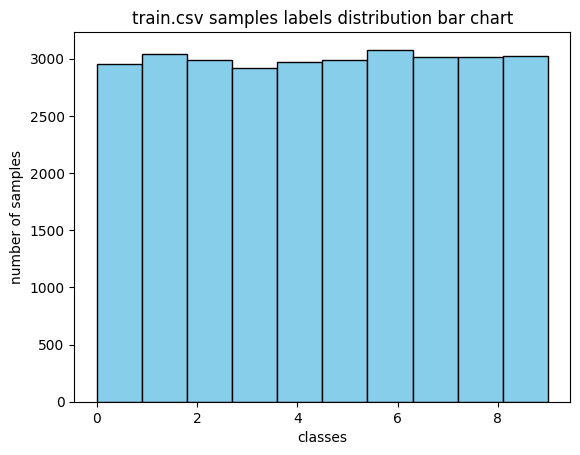

In [10]:
# Selecting output lable for training and testing data set
Y_train = data_train_df.label.to_numpy()

plt.hist(Y_train, bins=10, color='skyblue', edgecolor='black')
plt.title('train.csv samples labels distribution bar chart')
plt.xlabel('classes')
plt.ylabel('number of samples')

plt.show()

According to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Now, let's split the validation set by using the "train_test_split" method from sklearn. And see the distribution of both the train set and validation set. The portion for the validation set is 10% of all samples in train.csv (3000 samples approximately).

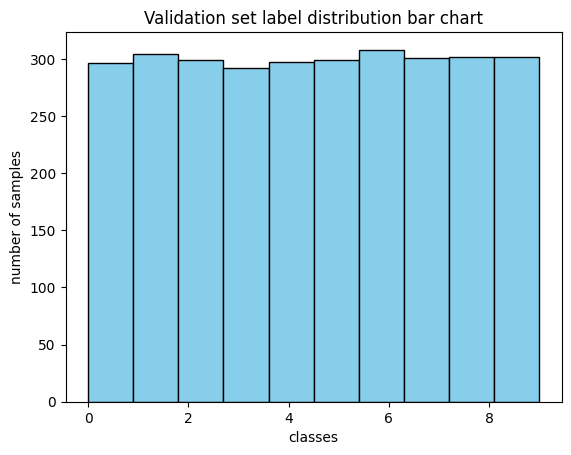

In [11]:
X_train_splited, X_validation, Y_train_splited, Y_validation = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train, random_state=481)

plt.hist(Y_validation, bins=10, color='skyblue', edgecolor='black')
plt.title('Validation set label distribution bar chart')
plt.xlabel('classes')
plt.ylabel('number of samples')
plt.show()

Since the validation set has equally distributed labels and all samples have equally distributed labels (see "train.csv samples labels distribution bar chart"); therefore, the sub training set must have equally distributed labels. Here sub training set means "X_train_splited"

### 4.1.3 Model 1 (Knn)

Below block of code implement the initial version of Knn method, in this initialization, I used default hyperparameters which provided by sklearn library. After construct the classifier, I find the accuracy in training set is 89.28% and the accuracy in validation set is 86.13%.

In [215]:
knn = KNeighborsClassifier()
start_time = time.time()

knn.fit(X_train_splited, Y_train_splited)

end_time = time.time()
knn_training_time = end_time - start_time
print("Accuracy on train set: {:.2f}".format(knn.score(X_train_splited, Y_train_splited)*100))
print("Accuracy on test set: {:.2f}".format(knn.score(X_validation, Y_validation)*100))

Accuracy on train set: 89.28
Accuracy on test set: 86.13


Below explaination is based on https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Even 86.13% is a good result, but my estimation is about 90%. As a result of that, I try to find whether there is a better combination of hyperparameters for Knn by using grid search method. In this method, I choose 3 hyperparameters:

"n_neighbours": it indicate how many neighbours the classifier needs to include when doing the classification. 

"weights": it indicates whether the classifier should trait the k closest neighbours with same weight ("uniform") or trait k closest neighbours with different weight according to the distance ("distance"). 

"metric": it simply indicates how to calculate the distance (I mainly illustrate about how euclidean works in my report). 

After set grid search parameters, I decided to do a 5-fold cross validation. I did not choose to do a 10-fold because my pc cannot handle them in a short time.

By the way, because grid search takes very long time, therefore, I comment them out, but you still can find the result in the comment part.

In [ ]:
"""
Code For grid search, Do not run, takeing long time:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, verbose=3, n_jobs=-1)
grid_search_knn.fit(X_train_splited, Y_train_splited)

print("Validation set score: {:.2f}".format(grid_search_knn.score(X_validation, Y_validation)))
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))

===================================================================
Output

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation set score: 0.86
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.85
Best estimator:
KNeighborsClassifier(metric='manhattan', weights='distance')
"""
hide_output()

Below block of code is the best combination of hyperparameters from grid search. However, this classifier is very like overfitting because it perform very good in training set but perform normaly in validation set.

In [217]:

grid_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')
grid_knn.fit(X_train_splited, Y_train_splited)


print("Accuracy on train set: {:.2f}".format(grid_knn.score(X_train_splited, Y_train_splited)*100))
print("Accuracy on validation set: {:.2f}".format(grid_knn.score(X_validation, Y_validation)*100))

Accuracy on train set: 100.00
Accuracy on validation set: 85.57


Finally, I find initial classifier has better performance, and the initialed classifier is less likely to overfit because the performance is similar on both the training set and validation set. Hence, I decided to use the original one to represent the Knn method.

In [218]:
best_knn = knn

### 4.1.4 Model 2 (Logistic Regression)

Below block of code implement the initial version of Knn method, in this initialization, I used default hyperparameters except for the maximum iterations. After construct the classifier, I find the accuracy in training set is 86.5% and the accuracy in validation set is 85.5%.

In [219]:
start_time = time.time()

logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train_splited, Y_train_splited)

end_time = time.time()
logreg_training_time = end_time - start_time

print("Accuracy on trainig set:", logreg.score(X_train_splited, Y_train_splited)*100)
print("Accuracy on validation set:", logreg.score(X_validation, Y_validation)*100)

Accuracy on trainig set: 86.52222222222223
Accuracy on validation set: 85.5


Below explaination is based on https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

My expectation is about 90% accuracy in validation set; therefore, I try to find whether there is a better combination of hyperparameters for Logistic regression by using grid search method. In this method, I choose 4 hyperparameters: 

"C": it simply means regularization strengh. Usually, bigger C means classifier prefer to fit training data and allow less mismatches; smaller C means allow more mismatches which can reduce the probability of overfitting, however, it can also lead to another problem - underfit. I set 2 values of "C" because I want to see which one could generate a better classifier.

"solver": it means the algorithm use for the optimization problem. I see there are many choices in sklearn website. In order to reduce training time, I choose 3 most relevent algorithm. "liblinear" suit for small datasets, "saga" is very fast for solving problem, and "lbfgs" can handle multiclass problem. 

"penalty": I just choose them based on above website because each algorithm need respond penalty method.

"max_iter": it just imply the iteration times. In order to reduce training time, I only set 4000 and 6000.

After set grid search parameters, I decided to do a 3-fold cross validation. I did not choose to do a 5-fold or 10-fold because there are more iterations (2*3*3*2*5 or 2*3*3*2*10 times) and my pc cannot finished these training in a short time.

By the way, because grid search takes very long time, therefore, I comment them out, but you can still find the result in the comment part.

In [264]:
"""
Code for Grid search:

param_grid_lg = {
    'C': [1.0, 5],
    'solver': ['liblinear', 'lbfgs', 'saga'], 
    'penalty': ['l2','l1','elasticnet'],  
    'max_iter': [4000, 6000]
}

logreg_2 = LogisticRegression()
grid_search_lg = GridSearchCV(logreg_2, param_grid_lg, cv=3, return_train_score=True, n_jobs= -1, verbose=3)

grid_search_lg.fit(X_train_splited, Y_train_splited)

print("Validation set score: {:.2f}".format(grid_search_lg.score(X_validation, Y_validation)))
print("Best parameters: {}".format(grid_search_lg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lg.best_score_))
print("Best estimator:\n{}".format(grid_search_lg.best_estimator_))

===============================================================
Output

48 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:

Validation set score: 0.85
Best parameters: {'C': 1.0, 'max_iter': 4000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.84
Best estimator:
LogisticRegression(max_iter=4000)
"""

'\nCode for Grid search:\n\nparam_grid_lg = {\n    \'C\': [1.0, 5],\n    \'solver\': [\'liblinear\', \'lbfgs\', \'saga\'], \n    \'penalty\': [\'l2\',\'l1\',\'elasticnet\'],  \n    \'max_iter\': [4000, 6000]\n}\n\nlogreg_2 = LogisticRegression()\ngrid_search_lg = GridSearchCV(logreg_2, param_grid_lg, cv=3, return_train_score=True, n_jobs= -1, verbose=3)\n\ngrid_search_lg.fit(X_train_splited, Y_train_splited)\n\nprint("Validation set score: {:.2f}".format(grid_search_lg.score(X_validation, Y_validation)))\nprint("Best parameters: {}".format(grid_search_lg.best_params_))\nprint("Best cross-validation score: {:.2f}".format(grid_search_lg.best_score_))\nprint("Best estimator:\n{}".format(grid_search_lg.best_estimator_))\n\n===============================================================\nOutput\n\n48 fits failed out of a total of 108.\nThe score on these train-test partitions for these parameters will be set to nan.\nIf these failures are not expected, you can try to debug them by setting e

Throug grid search, I find new combination of hyperparameters have small influences on the performance of model. Therefore, I decided to stop further investigation. Below block of code is the best combination of hyperparameters from grid search.

In [15]:
logreg_grid = LogisticRegression(C=1,max_iter=4000,penalty='l2',solver='lbfgs')
logreg_grid.fit(X_train_splited, Y_train_splited)
print("Accuracy on trainig set:", logreg_grid.score(X_train_splited, Y_train_splited)*100)
print("Accuracy on validation set:", logreg_grid.score(X_validation, Y_validation)*100)

Accuracy on trainig set: 86.52222222222223
Accuracy on validation set: 85.5


Comparing with grid search classifier, initial classifier has better accuracy in training set and same accuracy in validation set. Therefore, I choose initial classifier to represent logistic regression method.

In [222]:
best_logreg = logreg

### 4.1.5 Model 3 (SVM)

According to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. There are 4 types of SVM and I want to see the initial classifier performance for each of them.

In [223]:

init_lin_svm = SVC(kernel="linear")
init_lin_svm.fit(X_train_splited, Y_train_splited)
print("linear Train set score: {:.3f}".format(init_lin_svm.score(X_train_splited, Y_train_splited)))
print("linear Validation set score: {:.2f}".format(init_lin_svm.score(X_validation, Y_validation)*100))

init_poly_svm = SVC(kernel="poly")
init_poly_svm.fit(X_train_splited, Y_train_splited)
print("Poly Train set score: {:.3f}".format(init_poly_svm.score(X_train_splited, Y_train_splited)))
print("Poly Validation set score: {:.2f}".format(init_poly_svm.score(X_validation, Y_validation)*100))


init_rbf_svm = SVC(kernel="rbf")
init_rbf_svm.fit(X_train_splited, Y_train_splited)
print("rbf Train set score: {:.3f}".format(init_rbf_svm.score(X_train_splited, Y_train_splited)*100))
print("rbf Validation set score: {:.2f}".format(init_rbf_svm.score(X_validation, Y_validation)*100))

init_sigmoid_svm = SVC(kernel="sigmoid")
init_sigmoid_svm.fit(X_train_splited, Y_train_splited)
print("sigmoid Train set score: {:.3f}".format(init_sigmoid_svm.score(X_train_splited, Y_train_splited)*100))
print("sigmoid Validation set score: {:.2f}".format(init_sigmoid_svm.score(X_validation, Y_validation)*100))

linear Train set score: 0.885
linear Validation set score: 85.30
Poly Train set score: 0.906
Poly Validation set score: 87.43
rbf Train set score: 91.078
rbf Validation set score: 88.83
sigmoid Train set score: 69.830
sigmoid Validation set score: 68.63


After comparing their initial classifier, I think "rbf" and "poly" could probably be improved by using other combination of hyperparameters. For example, increase the regularization strength for "poly" methods. 

Firstly, I choose to use grid search to find the trend of better combination of hyperparameters for "poly" methods. There are 2 new hyperparameters:

"degree": it represents the Degree of the polynomial kernel function (‘poly’). According to https://stats.stackexchange.com/questions/348318/degree-parameter-for-svm-polynomial-kernel, higher degree means the decision boundary is more complex and could probably lead to overfitting. Here, I choose from 1 to 10 because I want to see which degree could have better result.

"tol": it represents tolarance for stopping criteria. It indicate when the change of the optimization algorithm in one iteration step is less than the tol value, the algorithm will stop iteration. Default tol is 0.0001, hence I want to find whether smaller "tol" will lead better result.

In [260]:
"""
Gridsearch Code:

svm2 = SVC()

param_grid2 = {'kernel':['poly'],
            'C': [0.1, 3, 10, 20, 30], 
            'degree': [1, 3, 5, 10],
            'tol': [0.001,0.0001]}

grid2 = GridSearchCV(svm2, param_grid2, cv=3, refit=True, verbose=3)
grid2.fit(X_train_splited, Y_train_splited)

print("Validation set score: {:.2f}".format(grid2.score(X_validation, Y_validation)))
print("Best parameters: {}".format(grid2.best_params_))
print("Best cross-validation score: {:.2f}".format(grid2.best_score_))
print("Best estimator:\n{}".format(grid2.best_estimator_))
==========================================================================
output:

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END C=0.1, degree=1, kernel=poly, tol=0.001;, score=0.818 total time=  13.1s
[CV 2/3] END C=0.1, degree=1, kernel=poly, tol=0.001;, score=0.808 total time=  13.4s
[CV 3/3] END C=0.1, degree=1, kernel=poly, tol=0.001;, score=0.812 total time=  13.0s
[CV 1/3] END C=0.1, degree=1, kernel=poly, tol=0.0001;, score=0.818 total time=  13.1s
[CV 2/3] END C=0.1, degree=1, kernel=poly, tol=0.0001;, score=0.808 total time=  13.1s
[CV 3/3] END C=0.1, degree=1, kernel=poly, tol=0.0001;, score=0.812 total time=  13.9s
[CV 1/3] END C=0.1, degree=3, kernel=poly, tol=0.001;, score=0.784 total time=  18.8s
[CV 2/3] END C=0.1, degree=3, kernel=poly, tol=0.001;, score=0.776 total time=  18.8s
[CV 3/3] END C=0.1, degree=3, kernel=poly, tol=0.001;, score=0.776 total time=  18.9s
[CV 1/3] END C=0.1, degree=3, kernel=poly, tol=0.0001;, score=0.783 total time=  17.0s
[CV 2/3] END C=0.1, degree=3, kernel=poly, tol=0.0001;, score=0.776 total time=  16.6s
[CV 3/3] END C=0.1, degree=3, kernel=poly, tol=0.0001;, score=0.776 total time=  16.5s
[CV 1/3] END C=0.1, degree=5, kernel=poly, tol=0.001;, score=0.693 total time=  23.1s
[CV 2/3] END C=0.1, degree=5, kernel=poly, tol=0.001;, score=0.691 total time=  22.8s
[CV 3/3] END C=0.1, degree=5, kernel=poly, tol=0.001;, score=0.682 total time=  22.1s
[CV 1/3] END C=0.1, degree=5, kernel=poly, tol=0.0001;, score=0.693 total time=  21.2s
[CV 2/3] END C=0.1, degree=5, kernel=poly, tol=0.0001;, score=0.691 total time=  21.0s
[CV 3/3] END C=0.1, degree=5, kernel=poly, tol=0.0001;, score=0.682 total time=  20.3s
[CV 1/3] END C=0.1, degree=10, kernel=poly, tol=0.001;, score=0.539 total time=  30.4s
[CV 2/3] END C=0.1, degree=10, kernel=poly, tol=0.001;, score=0.537 total time=  29.7s
[CV 3/3] END C=0.1, degree=10, kernel=poly, tol=0.001;, score=0.532 total time=  29.6s
[CV 1/3] END C=0.1, degree=10, kernel=poly, tol=0.0001;, score=0.539 total time=  30.6s
[CV 2/3] END C=0.1, degree=10, kernel=poly, tol=0.0001;, score=0.537 total time=  30.0s
[CV 3/3] END C=0.1, degree=10, kernel=poly, tol=0.0001;, score=0.532 total time=  29.4s
...
Best parameters: {'C': 10, 'degree': 3, 'kernel': 'poly', 'tol': 0.001}
Best cross-validation score: 0.88
Best estimator:
SVC(C=10, kernel='poly')
"""


'\nGridsearch Code:\n\nsvm2 = SVC()\n\nparam_grid2 = {\'kernel\':[\'poly\'],\n            \'C\': [0.1, 3, 10, 20, 30], \n            \'degree\': [1, 3, 5, 10],\n            \'tol\': [0.001,0.0001]}\n\ngrid2 = GridSearchCV(svm2, param_grid2, cv=3, refit=True, verbose=3)\ngrid2.fit(X_train_splited, Y_train_splited)\n\nprint("Validation set score: {:.2f}".format(grid2.score(X_validation, Y_validation)))\nprint("Best parameters: {}".format(grid2.best_params_))\nprint("Best cross-validation score: {:.2f}".format(grid2.best_score_))\nprint("Best estimator:\n{}".format(grid2.best_estimator_))\n==========================================================================\noutput:\n\nFitting 3 folds for each of 40 candidates, totalling 120 fits\n[CV 1/3] END C=0.1, degree=1, kernel=poly, tol=0.001;, score=0.818 total time=  13.1s\n[CV 2/3] END C=0.1, degree=1, kernel=poly, tol=0.001;, score=0.808 total time=  13.4s\n[CV 3/3] END C=0.1, degree=1, kernel=poly, tol=0.001;, score=0.812 total time=  13

After doing the grid search, I found the hyperparameter "C" can greatly affect the accuracy;  therefore, I added more value of "C" to the above dictionary (I added "30" to the above dictionary).  However, the result is still the same.

Finally, through grid search method, I found {kernel="poly", C=10, degree=3, tol=0.001} is the best combination of hyperparameters.

In [17]:
grid_poly_svm = SVC(kernel="poly", C=10, degree=3, tol=0.001)
grid_poly_svm.fit(X_train_splited, Y_train_splited)
print("Poly Train set score: {:.3f}".format(grid_poly_svm.score(X_train_splited, Y_train_splited)))
print("Poly Validation set score: {:.2f}".format(grid_poly_svm.score(X_validation, Y_validation)*100))

Poly Train set score: 0.973
Poly Validation set score: 89.37


Now, I need to find the best combination of hyperparameters for rbf method by using gridsearch and cross-validation. According to https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html. "C" and "gamma" are the 2 most important hyperparameters.

"C": it behaves as a regularization parameter in the SVM. A lower C will encourage a larger margin. That's why I set a larger range of "C" in the dictionary below.

"gamma": defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. I did not set this, because default gamma (scale) usually works very well (https://stats.stackexchange.com/questions/499916/why-svm-with-gamma-scale-for-rbf-kernel-works-so-well).

In [13]:

"""
Code

svm3 = SVC()

param_grid3 = {'kernel':['rbf'],
            'C': [0.1, 1, 10, 20, 50], 
            'tol': [0.001,0.0001]}

grid3 = GridSearchCV(svm3, param_grid3, cv=10, refit=True, verbose=3)
grid3.fit(X_train_splited, Y_train_splited)

print("Validation set score: {:.2f}".format(grid3.score(X_validation, Y_validation)))
print("Best parameters: {}".format(grid3.best_params_))
print("Best cross-validation score: {:.2f}".format(grid3.best_score_))
print("Best estimator:\n{}".format(grid3.best_estimator_))
===============================================
output

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.845 total time=  25.1s
[CV 2/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.830 total time=  25.0s
[CV 3/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.833 total time=  25.3s
[CV 4/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.830 total time=  25.8s
[CV 5/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.830 total time=  25.3s
[CV 6/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.830 total time=  25.1s
[CV 7/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.830 total time=  26.3s
[CV 8/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.834 total time=  27.5s
[CV 9/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.831 total time=  24.7s
[CV 10/10] END ....C=0.1, kernel=rbf, tol=0.001;, score=0.833 total time=  27.7s
[CV 1/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.845 total time=  26.6s
[CV 2/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.830 total time=  25.8s
[CV 3/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.833 total time=  26.2s
[CV 4/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.830 total time=  25.9s
[CV 5/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.830 total time=  25.5s
[CV 6/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.830 total time=  25.4s
[CV 7/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.830 total time=  25.6s
[CV 8/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.834 total time=  25.9s
[CV 9/10] END ....C=0.1, kernel=rbf, tol=0.0001;, score=0.831 total time=  25.9s
[CV 10/10] END ...C=0.1, kernel=rbf, tol=0.0001;, score=0.833 total time=  26.3s
[CV 1/10] END .......C=1, kernel=rbf, tol=0.001;, score=0.888 total time=  16.6s
[CV 2/10] END .......C=1, kernel=rbf, tol=0.001;, score=0.879 total time=  17.0s
[CV 3/10] END .......C=1, kernel=rbf, tol=0.001;, score=0.875 total time=  16.3s
[CV 4/10] END .......C=1, kernel=rbf, tol=0.001;, score=0.880 total time=  16.2s
...
Best parameters: {'C': 10, 'kernel': 'rbf', 'tol': 0.001}
Best cross-validation score: 0.89
Best estimator:
SVC(C=10)
"""

'\nCode\n\nsvm3 = SVC()\n\nparam_grid3 = {\'kernel\':[\'rbf\'],\n            \'C\': [0.1, 1, 10, 20, 50], \n            \'tol\': [0.001,0.0001]}\n\ngrid3 = GridSearchCV(svm3, param_grid3, cv=10, refit=True, verbose=3)\ngrid3.fit(X_train_splited, Y_train_splited)\n\nprint("Validation set score: {:.2f}".format(grid3.score(X_validation, Y_validation)))\nprint("Best parameters: {}".format(grid3.best_params_))\nprint("Best cross-validation score: {:.2f}".format(grid3.best_score_))\nprint("Best estimator:\n{}".format(grid3.best_estimator_))\n===============================================\noutput\n\nFitting 10 folds for each of 10 candidates, totalling 100 fits\n[CV 1/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.845 total time=  25.1s\n[CV 2/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.830 total time=  25.0s\n[CV 3/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.833 total time=  25.3s\n[CV 4/10] END .....C=0.1, kernel=rbf, tol=0.001;, score=0.830 total time=  25.8s\n[CV 5/1

Since I already set many values for "C"; therefore, I do not think I need to do further investigation. Finally, I think {'C': 10} is the best hyperparameter for "rbf" svm. Notice that "tol"=0.001 is the default value.

In [227]:
start_time = time.time()

grid_rbf_svm = SVC(kernel="rbf", C=10, tol=0.001) 
grid_rbf_svm.fit(X_train_splited, Y_train_splited)
print("rbf Train set score: {:.3f}".format(grid_rbf_svm.score(X_train_splited, Y_train_splited)))
print("rbf Validation set score: {:.2f}".format(grid_rbf_svm.score(X_validation, Y_validation)*100))

end_time = time.time()
svm_training_time = end_time - start_time

rbf Train set score: 0.975
rbf Validation set score: 90.23


By comparing the results of "RBF" and "poly" SVM. I found "RBF" SVM performs better than "poly" SVM which achieves 90.23% accuracy on the validation set. Hence, I decided to use "RBF" SVM to represent SVM.

In [228]:
best_svm = grid_rbf_svm

### 4.1.6 Model 4 (Boosting)

Since we only learned ada boosting and gradient boosting; therefore, I want to see which one chould generate to a better model. 

##### 4.1.6.1 (Ada Boosting)

Below block of code implement the initial version of ada boosting method, in this initialization, I used default hyperparameters. 

In [229]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(criterion='entropy', max_depth=1), random_state=481)

ada_clf.fit(X_train_splited, Y_train_splited)

print("Train set score: {:.3f}".format(ada_clf.score(X_train_splited, Y_train_splited)*100))
print("Validation set score: {:.2f}".format(ada_clf.score(X_validation, Y_validation)*100))

c:\Users\slh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train set score: 50.019
Validation set score: 50.80



After construct the classifier, I find it performs very bad, hence I only set few values for each hyperparameters. Because of its bad performance, I did not place great hope on it. I choose following hyperparameters because of the website https://www.analyticsvidhya.com/blog/2021/03/introduction-to-adaboost-algorithm-with-python/.

'n_estimators': it means the number of boosting stages to perform. According to sklearn doc, larger "n_estimators" usually lead to better classifier, however, it usually take more time to train, too; therefore, the max "n_estimators" is 200 in the following dictionary.

'learning_rate': indicates the contribution of each weak classifier for the final strong classifier. I just random pick value for it.

"estimator": the types of weak classifier. I just random pick value for it.

In [267]:
"""
ada = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1.0],  
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)] 
}

ada_grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=3) 

ada_grid_search.fit(X_train_splited, Y_train_splited)

print("Validation set score: {:.2f}".format(ada_grid_search.score(X_validation, Y_validation)))
print("Best parameters: {}".format(ada_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_grid_search.best_score_))
print("Best estimator:\n{}".format(ada_grid_search.best_estimator_))

=============================================================================
output

Validation set score: 0.68
Best parameters: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation score: 0.68
Best estimator:
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01)
"""

'\nada = AdaBoostClassifier()\n\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],  \n    \'learning_rate\': [0.01, 0.1, 1.0],  \n    \'estimator\': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)] \n}\n\nada_grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, scoring=\'accuracy\', cv=3, n_jobs=-1, verbose=3) \n\nada_grid_search.fit(X_train_splited, Y_train_splited)\n\nprint("Validation set score: {:.2f}".format(ada_grid_search.score(X_validation, Y_validation)))\nprint("Best parameters: {}".format(ada_grid_search.best_params_))\nprint("Best cross-validation score: {:.2f}".format(ada_grid_search.best_score_))\nprint("Best estimator:\n{}".format(ada_grid_search.best_estimator_))\n\n=============================================================================\noutput\n\nValidation set score: 0.68\nBest parameters: {\'estimator\': DecisionTreeClassifier(max_depth=3), \'learning_rate\': 0.01, \'n_estimators\': 50}\nBest cross-validation score: 0.6

As I expected, even I use grid search to improve the performance of ada boosting, its performance is still not ideal. As a result, I will not implement its advanced version.

##### 4.1.6.2 (Gradient Boosting)

Below block of code implements the initial version of ada boosting method, in this initialization, I set 3 hyperparameters that have strong effection based on website https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html.

"max_deepth": it controls the maximum depth of each weak classifier, which is typically a decision tree. I set it to 3 to prevent the model from overfitting and to maintain a moderate complexity for each tree. This helps enhance the model's generalization capability."

"n_estimators": it means the number of boosting stages to perform. According to sklearn doc, larger "n_estimators" usually lead to better classifier, however, it usually take more time to train, too. Therefore, I set it as 200.

"learning_rate": it simply represent the learning rate for gradient descent. I set it as 0.2 because default learning_rate is 0.1. In addition I think slightly larger learning_rate can accelerate the convergence process while still being cautious to avoid overshooting the optimal solution.

Caution: Run below block of code take at least 1 hour !!!!!!!

In [231]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

# I set max_depth manually, because when it equals 3, this classifier has better performance
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate=0.2, random_state=481)
gb_clf.fit(X_train_splited, Y_train_splited)

end_time = time.time()
gradient_training_time = end_time - start_time

print("Train set score: {:.3f}".format(gb_clf.score(X_train_splited, Y_train_splited)*100))
print("Test set score: {:.2f}".format(gb_clf.score(X_validation, Y_validation)*100))

Train set score: 98.004
Test set score: 85.40


As I mentioned above, train this classifier takes approximately 1 hours. Therefore, it is almost impossible to do grid search and cross validation, otherwise, my pc will get stuck and I cannot finish other units' homework. Moreover, SVM classifier already satisfy my requirement (about 90% accuracy). Hence, I give up boosting method. By the way, since gradient boosting method performs much better than ada boosting method, therefore, I choose gradient boosting method to represent boosting method.

In [232]:
best_boosting = gb_clf

### 4.1.7 Evaluation

Loading test1.csv and do the same data preprocessing steps, which we did for train.csv, to it.

In [21]:
# import test dataset
data_test = pd.read_csv('./data/test1.csv')
# We also need to preprocessing testing data
data_test_feature = data_test.loc[:, "v1":"v784"].to_numpy()

X_test = scaler.transform(data_test_feature)

print("Standaidization feature shape:", X_test.shape)
X_test = pca.transform(X_test)

Y_test = data_test.label.to_numpy()


print("PCA feature shape:", X_test.shape)

Standaidization feature shape: (2000, 784)
PCA feature shape: (2000, 187)


Now, let's evaluate the performance of the best version of each model by using confusion matrix.

#### 4.1.7.1 Knn

Let's check Knn method's confusion matrix on the validation set.

In [234]:
knn_actual = Y_validation
knn_predict = best_knn.predict(X_validation)
print(metrics.classification_report(knn_actual, knn_predict))

# show the confusion matrix
print(metrics.confusion_matrix(knn_actual, knn_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       296
           1       0.98      0.97      0.98       304
           2       0.75      0.83      0.79       299
           3       0.88      0.89      0.89       292
           4       0.78      0.74      0.76       297
           5       0.99      0.84      0.91       299
           6       0.70      0.61      0.65       308
           7       0.89      0.95      0.92       301
           8       0.97      0.95      0.96       302
           9       0.90      0.97      0.93       302

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000

[[254   0   6   8   2   0  23   0   3   0]
 [  0 294   2   5   2   0   0   0   0   1]
 [  4   1 249   0  29   0  16   0   0   0]
 [ 13   3   2 260  11   0   3   0   0   0]
 [  3   0  26  11 220   0  36   0   1   0]
 [  0   0   0   1   0 252 

Precision score: for classes 1, 5, 8, and 9, these classes can accurately be classified. However, for classes 2 and 6, the probability of correctly identifying them is less than 75%. Specifically, this classifier prefers to make fewer errors when predicting classes 1, 5, 8, and 9 and makes slightly more errors when predicting classes 2 and 6.

Recall score: A bigger recall score means the classifier can identify more correct samples and increase the probability of mismatching. As you can see, classes 1, 3, 8, and 9 have very high recall scores and classes 4 and 6 have low recall scores.

F1-score: This is the average performance of this classifier when classifying each class. Through the table, we can see it performs very well when classifying classes 1, 5, 8, and 9 and performs very badly when classifying class 6. 

Conclusion: This classifier is not bad because it has 86% accuracy in the validation set. It can predict most classes correctly except for classes 2, 4, and 6.

Let's check Knn method's confusion matrix on the test set.

In [235]:
knn_actual = Y_test
knn_predict = best_knn.predict(X_test)
print(metrics.classification_report(knn_actual, knn_predict))

# show the confusion matrix
print(metrics.confusion_matrix(knn_actual, knn_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       191
           1       0.98      0.96      0.97       199
           2       0.71      0.78      0.74       191
           3       0.87      0.87      0.87       174
           4       0.79      0.81      0.80       203
           5       0.98      0.83      0.90       210
           6       0.70      0.57      0.63       201
           7       0.86      0.95      0.90       212
           8       0.99      0.95      0.97       216
           9       0.89      0.93      0.91       203

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

[[168   1   2   6   0   0  13   0   1   0]
 [  1 192   2   3   0   0   1   0   0   0]
 [  2   0 149   2  21   0  16   1   0   0]
 [  8   3   2 151   9   0   1   0   0   0]
 [  1   0  15   8 165   0  14   0   0   0]
 [  0   0   1   0   0 174 

Precision score: class 2 and 6 have bad precision scores

Recall score: class 2 and 6 have bad recall scores

F1-score: Classes 2 and 6 are very difficult for this classifier to identify.

Conclusion: The overall accuracy of this classifier in the test set is 85% which is slightly lower than in the validation set. The main reason for this is that this classifier cannot identify class 6 correctly. Moreover, through the matrix, you can find that this classifier always identifies class 6 as class 0, 2, or 4. Namely, it will confuse shirt with a t-shirt, pullover, or coat.

#### 4.1.7.2 Logistic regression

Let's check logistic regression method's confusion matrix on the validation set.

In [236]:
lg_actual = Y_validation
lg_predict = best_logreg.predict(X_validation)
print(metrics.classification_report(lg_actual, lg_predict))

# show the confusion matrix
print(metrics.confusion_matrix(lg_actual, lg_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       296
           1       0.96      0.96      0.96       304
           2       0.72      0.76      0.74       299
           3       0.87      0.89      0.88       292
           4       0.76      0.74      0.75       297
           5       0.96      0.95      0.96       299
           6       0.63      0.60      0.61       308
           7       0.95      0.94      0.95       301
           8       0.95      0.94      0.95       302
           9       0.95      0.97      0.96       302

    accuracy                           0.85      3000
   macro avg       0.85      0.86      0.85      3000
weighted avg       0.85      0.85      0.85      3000

[[237   2   9  15   2   0  29   0   2   0]
 [  0 292   1   7   2   0   2   0   0   0]
 [  4   1 226   1  35   0  29   0   3   0]
 [ 12   5   5 259   6   0   5   0   0   0]
 [  0   1  28   8 220   0  39   0   1   0]
 [  0   0   0   0   0 285 

Through the table, it is not difficult to find that this classifier cannot easily detect class 6. All scores for detecting class 6 are less than 63% which is lower than the overall accuracy of 85%.

Let's check logistic regression method's confusion matrix on the test set.

In [237]:
lg_actual = Y_test
lg_predict = best_logreg.predict(X_test)
print(metrics.classification_report(lg_actual, lg_predict))

# show the confusion matrix
print(metrics.confusion_matrix(lg_actual, lg_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       191
           1       0.95      0.97      0.96       199
           2       0.75      0.77      0.76       191
           3       0.82      0.86      0.84       174
           4       0.81      0.80      0.81       203
           5       0.92      0.87      0.90       210
           6       0.71      0.64      0.67       201
           7       0.88      0.91      0.89       212
           8       0.96      0.95      0.96       216
           9       0.90      0.93      0.92       203

    accuracy                           0.86      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.86      0.86      0.86      2000

[[162   2   0  10   0   1  13   0   3   0]
 [  0 194   1   4   0   0   0   0   0   0]
 [  3   1 147   4  20   0  14   0   2   0]
 [  4   5   2 150   6   0   7   0   0   0]
 [  1   0  16   8 162   0  15   0   0   1]
 [  0   1   0   1   0 183 

As I expected, this classifier performs pretty badly when it classifies class 6. Through the matrix, you can see classifier always identifies class 6 as class 0, 2, or 4.

#### 4.1.7.3 SVM

Let's check SVM method's confusion matrix on the validation set.

In [238]:
svm_actual = Y_validation
svm_predict = best_svm.predict(X_validation)
print(metrics.classification_report(svm_actual, svm_predict))

# show the confusion matrix
print(metrics.confusion_matrix(svm_actual, svm_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       296
           1       0.98      0.98      0.98       304
           2       0.81      0.84      0.82       299
           3       0.92      0.92      0.92       292
           4       0.85      0.84      0.84       297
           5       0.98      0.95      0.97       299
           6       0.75      0.71      0.73       308
           7       0.96      0.97      0.97       301
           8       0.98      0.97      0.98       302
           9       0.96      0.98      0.97       302

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000

[[256   1   6   2   0   0  28   0   3   0]
 [  0 297   0   4   1   0   1   0   0   1]
 [  4   0 252   1  21   0  21   0   0   0]
 [  8   2   2 269   8   0   3   0   0   0]
 [  1   0  21   7 248   0  19   0   1   0]
 [  0   0   0   1   0 285 

This classifier performance is pretty good on the validation set. Through the table, you can find that there is not a score lower than 70%. The most difficult class for it to classify is class 6. Through the matrix, we know this classifier likes to classify class 6 as class 0, 2, 3, and 4.

Let's check SVM method's confusion matrix on the test set.

In [239]:
svm_actual = Y_test
svm_predict = best_svm.predict(X_test)
print(metrics.classification_report(svm_actual, svm_predict))

# show the confusion matrix
print(metrics.confusion_matrix(svm_actual, svm_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       191
           1       0.97      0.98      0.97       199
           2       0.83      0.84      0.84       191
           3       0.89      0.90      0.90       174
           4       0.86      0.89      0.87       203
           5       0.99      0.96      0.97       210
           6       0.79      0.69      0.74       201
           7       0.95      0.95      0.95       212
           8       0.98      0.97      0.97       216
           9       0.94      0.97      0.96       203

    accuracy                           0.91      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.91      0.91      0.91      2000

[[171   2   1   5   0   1  10   0   1   0]
 [  0 195   1   3   0   0   0   0   0   0]
 [  3   0 161   3  11   0  12   0   1   0]
 [  3   4   3 157   6   0   1   0   0   0]
 [  1   0   8   4 181   0   9   0   0   0]
 [  0   0   0   0   0 201 

It is accuracy on the test set is 91%. However, it is still very difficult for this classifier to identify class 6 correctly. Through the matrix, we know this classifier likes to classify class 6 as class 0, 2, and 4.

#### 4.1.7.4 Boosting

Let's check Boosting method's confusion matrix on the validation set.

In [240]:
boost_actual = Y_validation
boost_predict = best_boosting.predict(X_validation)
print(metrics.classification_report(boost_actual, boost_predict))

# show the confusion matrix
print(metrics.confusion_matrix(boost_actual, boost_predict))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       296
           1       0.97      0.95      0.96       304
           2       0.75      0.81      0.77       299
           3       0.87      0.87      0.87       292
           4       0.77      0.75      0.76       297
           5       0.95      0.91      0.93       299
           6       0.65      0.62      0.63       308
           7       0.95      0.93      0.94       301
           8       0.93      0.93      0.93       302
           9       0.93      0.97      0.95       302

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000

[[237   1   7  11   0   1  32   0   7   0]
 [  1 289   3   8   3   0   0   0   0   0]
 [  2   1 241   0  27   0  26   0   2   0]
 [ 13   4   3 255   7   0  10   0   0   0]
 [  0   0  31  11 223   0  31   0   1   0]
 [  0   1   0   1   0 273 

Through the table we know this classifier cannot easily detect class 6 on the validation set. Through the matrix, we know it always identify class 6 as class 0, 2, or 4.

Let's check Boosting method's confusion matrix on the test set.

In [241]:
boost_actual = Y_test
boost_predict = best_boosting.predict(X_test)
print(metrics.classification_report(boost_actual, boost_predict))

# show the confusion matrix
print(metrics.confusion_matrix(boost_actual, boost_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       191
           1       0.96      0.96      0.96       199
           2       0.79      0.79      0.79       191
           3       0.86      0.86      0.86       174
           4       0.79      0.80      0.79       203
           5       0.95      0.92      0.94       210
           6       0.72      0.71      0.71       201
           7       0.93      0.93      0.93       212
           8       0.97      0.93      0.95       216
           9       0.92      0.95      0.93       203

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

[[167   1   0   9   0   1  12   0   1   0]
 [  0 192   2   4   1   0   0   0   0   0]
 [  3   0 151   2  22   0  11   0   2   0]
 [  4   4   3 150   7   0   6   0   0   0]
 [  1   0  12   7 162   0  21   0   0   0]
 [  1   2   0   0   0 194 

The performance of this classifier is slightly better on the test set. However, the main issue is still class 6 identification. Through the matrix, we can find it still always classifies class 6 as class 0, 2, and 4.

### 4.1.8 Comparison

In this part, I will mainly focus on comparing these 4 models' training time and accuracy. As for inference time, it is highly related to the training time, because when I do the grid search, I just simply train different models with certain combinations of hyperparameters.

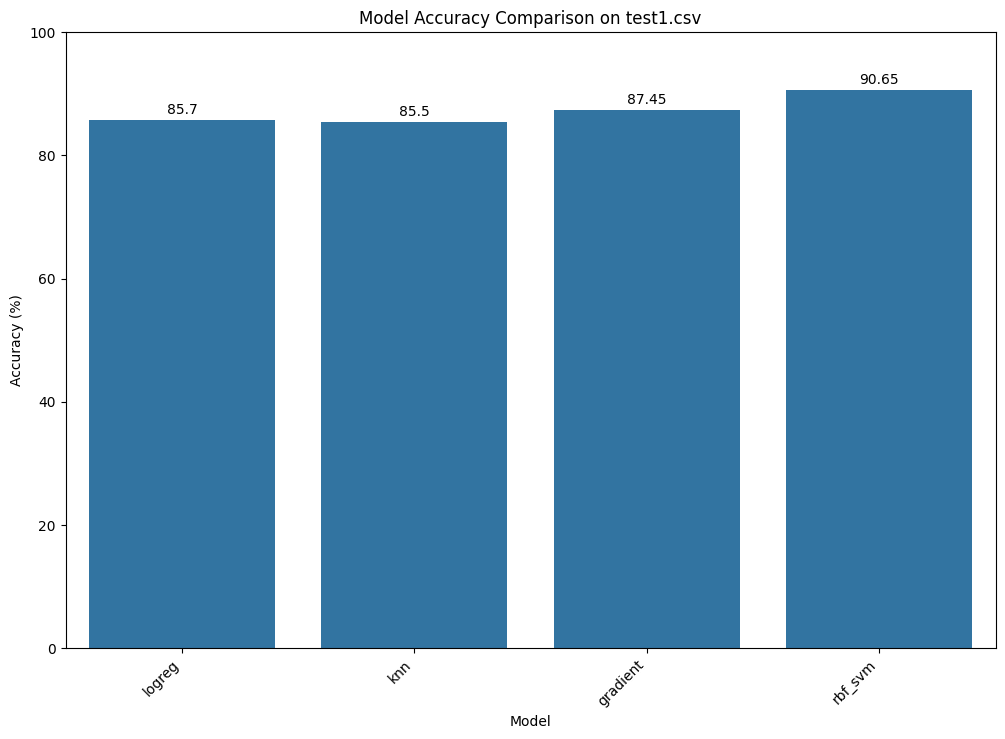

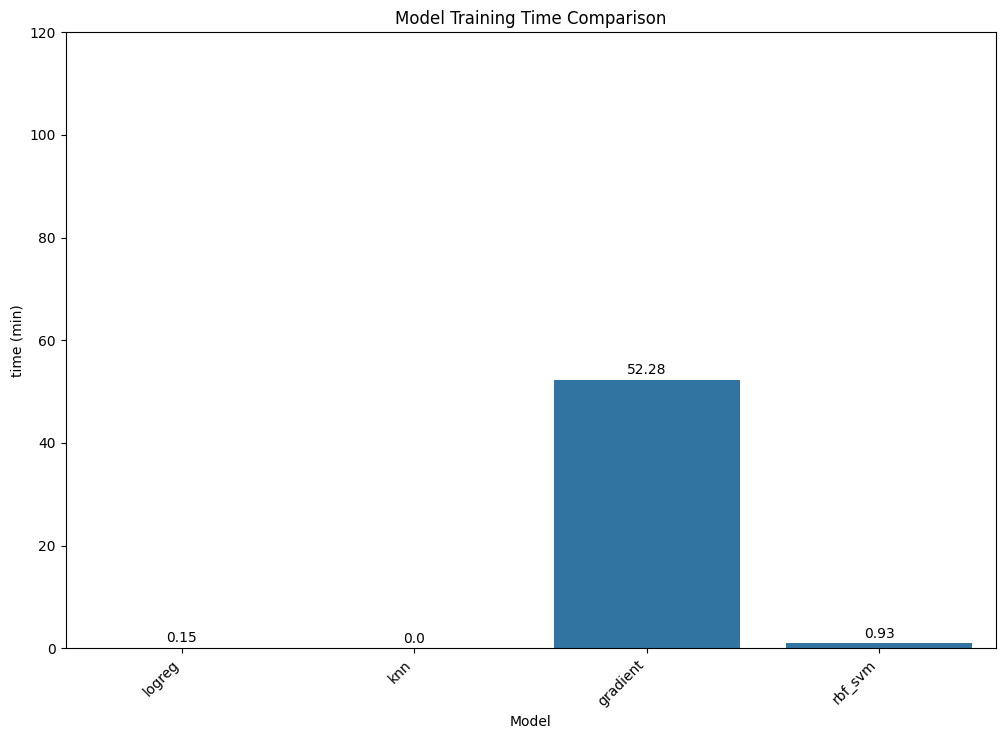

In [253]:
# refer to https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
import seaborn as sns

model_accuracies = {
    'logreg': best_logreg.score(X_test, Y_test)*100,
    'knn': best_knn.score(X_test, Y_test)*100,
    'gradient': best_boosting.score(X_test, Y_test)*100,
    "rbf_svm" : best_svm.score(X_test, Y_test)*100
}

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy (%)'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy (%)', data=accuracy_df)

for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy (%)'] + 0.5, round(row['Accuracy (%)'], 2), 
             color='black', ha="center", va="bottom")

plt.title('Model Accuracy Comparison on test1.csv')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100) 
plt.show()

model_time = {
    'logreg': logreg_training_time/60,
    'knn': knn_training_time/60,
    'gradient': gradient_training_time/60,
    "rbf_svm" : svm_training_time/60
}

time_df = pd.DataFrame(list(model_time.items()), columns=['Model', 'time (min)'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='time (min)', data=time_df)

for index, row in time_df.iterrows():
    plt.text(index, row['time (min)'] + 0.5, round(row['time (min)'], 2), 
             color='black', ha="center", va="bottom")

plt.title('Model Training Time Comparison')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Model')
plt.ylabel('time (min)')
plt.ylim(0, 120) 
plt.show()

Firstly, let's analyze the accuracy of each model in the test1.csv data set. From the first bar chart, you can see the SVM method has the highest accuracy which is 90.65% and the Knn method has the lowest accuracy which is 85.5%. Secondly, let's analyze the training time for each model. As you can see, because of calculating the distance is very simple, therefore, knn method takes the least time, which is less than 1 minute. The gradient boosting method takes the longest time, which is about 1 hour (time may change due to different hardware). The reason is that convergence is slow with gradient descent, especially when we set a very small learning rate.

### 4.1.9 The Best Classifier

From 4.1.8, we know rbf_svm has the highest accuracy 90.65%, and middle level training time. Therefore, I think rbf_svm is the best classifier. 

Notice that the hyperparameters for rbf_svm are {kernel="rbf", C=10, tol=0.001}; however, I decided to train the classifier again by using train.csv as a training set and test1.csv as a test set. The reason behind that is I think a larger training set can lead to a better classifier. Moreover, I also need to use Grid-search and cross-validation methods again to find the newest best combination of hyperparameters for this model.

In [243]:
"""
best_classifier_init = SVC()

best_grid_para = {'kernel':['rbf'],
            'C': [0.1, 1, 10, 20, 30, 50], 
            'tol': [0.001,0.0001]}

best_grid = GridSearchCV(best_classifier_init, best_grid_para, cv=10, refit=True, verbose=2)
best_grid.fit(X_train, Y_train)

print("Validation set score: {:.2f}".format(best_grid.score(X_test, Y_test)))
print("Best parameters: {}".format(best_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(best_grid.best_score_))
print("Best estimator:\n{}".format(best_grid.best_estimator_))

==================================================================
output

Best parameters: {'C': 10, 'kernel': 'rbf', 'tol': 0.001}
Best cross-validation score: 0.90
Best estimator:
SVC(C=10)
"""

'\nbest_classifier_init = SVC()\n\nbest_grid_para = {\'kernel\':[\'rbf\'],\n            \'C\': [0.1, 1, 10, 20, 30, 50], \n            \'tol\': [0.001,0.0001]}\n\nbest_grid = GridSearchCV(best_classifier_init, best_grid_para, cv=10, refit=True, verbose=2)\nbest_grid.fit(X_train, Y_train)\n\nprint("Validation set score: {:.2f}".format(best_grid.score(X_test, Y_test)))\nprint("Best parameters: {}".format(best_grid.best_params_))\nprint("Best cross-validation score: {:.2f}".format(best_grid.best_score_))\nprint("Best estimator:\n{}".format(best_grid.best_estimator_))\n\n==================================================================\noutput\n\nBest parameters: {\'C\': 10, \'kernel\': \'rbf\', \'tol\': 0.001}\nBest cross-validation score: 0.90\nBest estimator:\nSVC(C=10)\n'

As you can see, "C" = 10 is still the best hyper-parameter for this model. As a result, the best classifier is the following.

In [25]:
best_classifier = SVC(kernel='rbf', C=10)
best_classifier.fit(X_train,Y_train)

print("best_classifier Train set score: {:.3f}".format(best_classifier.score(X_train, Y_train)*100)) #train.csv
print("best_classifier Test set score: {:.2f}".format(best_classifier.score(X_test, Y_test)*100)) # test1.csv

best_classifier Train set score: 97.450
best_classifier Test set score: 90.95


### 4.1.10 Loading testing data

Loading test2.csv data for prediction

In [18]:
# kaggle test data set
kaggle_test = pd.read_csv('./data/test2.csv')
data_kaggle_feature = kaggle_test.loc[:, "v1":"v784"].to_numpy()

In [20]:
# do the data preprocessing for test2.csv

X_kaggle = scaler.transform(data_kaggle_feature)
print("Standaidization feature shape:", X_kaggle.shape)
X_kaggle = pca.transform(X_kaggle)
print("PCA feature shape:", X_kaggle.shape)

Standaidization feature shape: (5000, 784)
PCA feature shape: (5000, 187)


Now, I want to concatenate "train.csv" and "test1.csv", and use that combined data set to train my best classifier. This was allowed according to https://edstem.org/au/courses/18163/discussion/2173861. It works because more samples are provided and it will improve my classifiers. I will demonstrate the different accuracies below when using test1.csv to test my classifier.

In [248]:
# combine train.csv and test1.csv
X_combined = np.concatenate((X_train, X_test), axis=0)
Y_combined = np.concatenate((Y_train, Y_test), axis=0)
print("Combined feature shape:", X_combined.shape)
print("Combined label shape:", Y_combined.shape)

Combined feature shape: (32000, 187)
Combined label shape: (32000,)


In [249]:
best_classifier_for_kaggle = SVC(kernel='rbf', C=10)
best_classifier_for_kaggle.fit(X_combined,Y_combined)

print("Best Train set score: {:.3f}".format(best_classifier_for_kaggle.score(X_train, Y_train)*100))
print("Best Test set score: {:.2f}".format(best_classifier_for_kaggle.score(X_test, Y_test)*100))

Best Train set score: 97.457
Best Test set score: 97.15


Use the your best classifier to make predictions for the test data. The predictions should be stored in a vector named `output`, with a length of 5000.

In [250]:
output = best_classifier_for_kaggle.predict(X_kaggle)

Check the length of output.

In [251]:
print(len(output))

5000


Extract the first 2000 labels from "output" and compare them with test1.csv labels. The accuracy should be the same as "97.15"

In [252]:
print("Prediction Accuracy on kaggle first 2000 samples: {:.2f}".format(accuracy_score(output[:2000], Y_test)*100))

Prediction Accuracy on kaggle first 2000 samples: 97.15


Save your prediction vector as a `test_output.csv` file, which contains two columns: `id` and `label`. Please refer to the `example_output.csv` for the structure of this output file. 

In [202]:
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./test_output.csv', sep=",", float_format='%d',index_label="id")

## 4.2 Report

The report must be structured into the following key sections:

1. **Introduction**: Provide a comprehensive overview of the dataset, outline the methods chosen, and summarize the key findings and results.
2. **Methodology**: Describe pre-processing techniques and ML algorithms employed in this assignment. Include a discussion of the theoretical principles underlying each method and explain the rationale behind your choices.
3. **Result and Discussion**: Detail the experimental settings (e.g., implementation strategies, hyperparameter finetuning strategies, etc.). Present the results obtained from the selected algorithms and discuss their implications. Compare the performance of all models, considering factors such as accuracy, model complexity, training time, and inference time. Employ high-quality plots, figures, and tables to visually support and enhance the discussion of these results.
4. **Conclusion**: Summarize your main findings, mention any limitations methods and results and suggest potential directions for future works.
5. **References**: include the references cited in your report in a consistent format.

##### Important Notes

- The maximum length of the main report is 8 pages (excluding appendix and references).

-  You must include an appendix that clearly provides the instructions on how to setup the environment to run your code, especialy the installation guide and version of any external packages and
libraries used for implementation. In addition, you should include the hardware configurations used for the coding environment.

- The report must be in PDF format. Make sure the report is well-structured, easy to read, and that it presents your findings in a logical and organized way.


# 5. Submission Guidelines

## 5.1 Group Registration

For this assignment, you can work in groups of TWO. Please register your group under *People → Group → A1.1-Group* or *People → Group → A1.2-Group* on Canvas (We have created two separate group sets to accommodate the large number of students enrolled in this course).  

**The group registration should be done by Friday, Aug 30th, 2024.**

## 5.2 Submit your work

### 5.2.1 Submit to Kaggle

We use the Kaggle leaderboard for evaluating the results predicted by your models on unseen data. Follow the steps below to submit your work to the Kaggle leaderboard.

Kaggle link: [https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/)

1. Use the [Kaggle link](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) to join the competition, you need to create a Kaggle account if you don’t
have one.

2. Go to Team $\rightarrow$ Use your registered Group ID on Canvas as your team name (e.g., `A1.1-Group 1`). You can create a Kaggle team with up to 2 members.
   
3. Go to Description $\rightarrow$ Check the IMPORTANT NOTES for the assignment.
   
4. Submit Predictions $\rightarrow$ Follow the submission format and submit your prediction output file (`test_output.csv`).
   
5. Leaderboard $\rightarrow$ Check your accuracy score at the Leaderboard.

In summary, go to [Kaggle Page](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) $\rightarrow$ Join Competition $\rightarrow$ Create a Team $\rightarrow$ Submit Predictions $\rightarrow$ Submit file `test_output.csv`

IMPORTANT: This link is only available to the students of COMP4318/5318. All groups need to submit `test_output.csv` to Kaggle for marking puporse. Only 5 submissions are allowed per day
for Kaggle. Group ID on Canvas and Kaggle have to be identical otherwise the submission will not be marked for the Accuracy part.



### 5.2.2 Submit to Canvas

#### Proceed to the submission box on Canvas and submit 4 files separately as follows:

   1. A `.pdf` report file.

   2. An `.ipynb` code file: a Jupyter Notebook containing all your implementation. You can reuse the provided `.ipynb` template.
    
   3. A `.pdf` code file: this file is exported from the `.ipynb` file for checking plagiarism. 

   4. A `test_output.csv` file: contains the predictions made by your best classifier on unseen data. This file must be consistent with the one submitted on Kaggle.

There are two different submission boxes for the different group sets: *Assignment 1 - Submission (for A1.1-Group)* and *Assignment 1 - Submission (for A1.2-Group)*. Please ensure you submit to the correct box corresponding to your group ID.

##### File Naming Conventions 

The submission files should be named with your group ID and all student ID (SID) separated by the underscore (_). For example,

- a1_groupID_SID1_SID2.ipynb (code) 
  
- a1_groupID_SID1_SID2.pdf (pdf version of the code)
  
- a1_groupID_SID1_SID2_report.pdf (report)
  
where SID1 and SID2 are the SIDs of the two students.


##### Important Notes:
-	Only one group member needs to submit the assignment on behalf of the group.

-	Do NOT submit the dataset or zip files to Canvas. We will copy the `data` folder to the same directory with your `.ipynb` file to run your code. Please make sure your code is able to read the dataset from this folder.

-	Both the code and report will be checked for plagiarism.

##### Other guidelines

1.	Please refer to lecture notes, lab materials, and other course resources for different ML methods. 

2.	Please proceed your own way if we do not specify it in the assignment details.

3.	You can use any packages or code which have been introduced in lectures or tutorials. If you use any other packages or code snippets, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked.


## 5.3 Late Submission Penalties

##### A penalty of MINUS 5 percent (-5%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas and Kaggle may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

##### All files required for assignment 1 can be downloaded from Canvas $\rightarrow$ Assignments $\rightarrow$ Assignment 1 - Specification


## 5.4 Marking Rubric

Please refer to the rubric, which is available in the submission boxes on Canvas, for detailed marking scheme.

# 6. Inquiries after releasing the marking

**After Assignment 1 marks come out, please submit your inquiries about marking within the 1st week. All inquiries after that will be ignored.**

# 7. Academic honesty

Please read the University policy on Academic Honesty very carefully: 
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include: 

    * a permanent record of academic dishonesty on your student file, 
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa. 

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating!